In [2]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

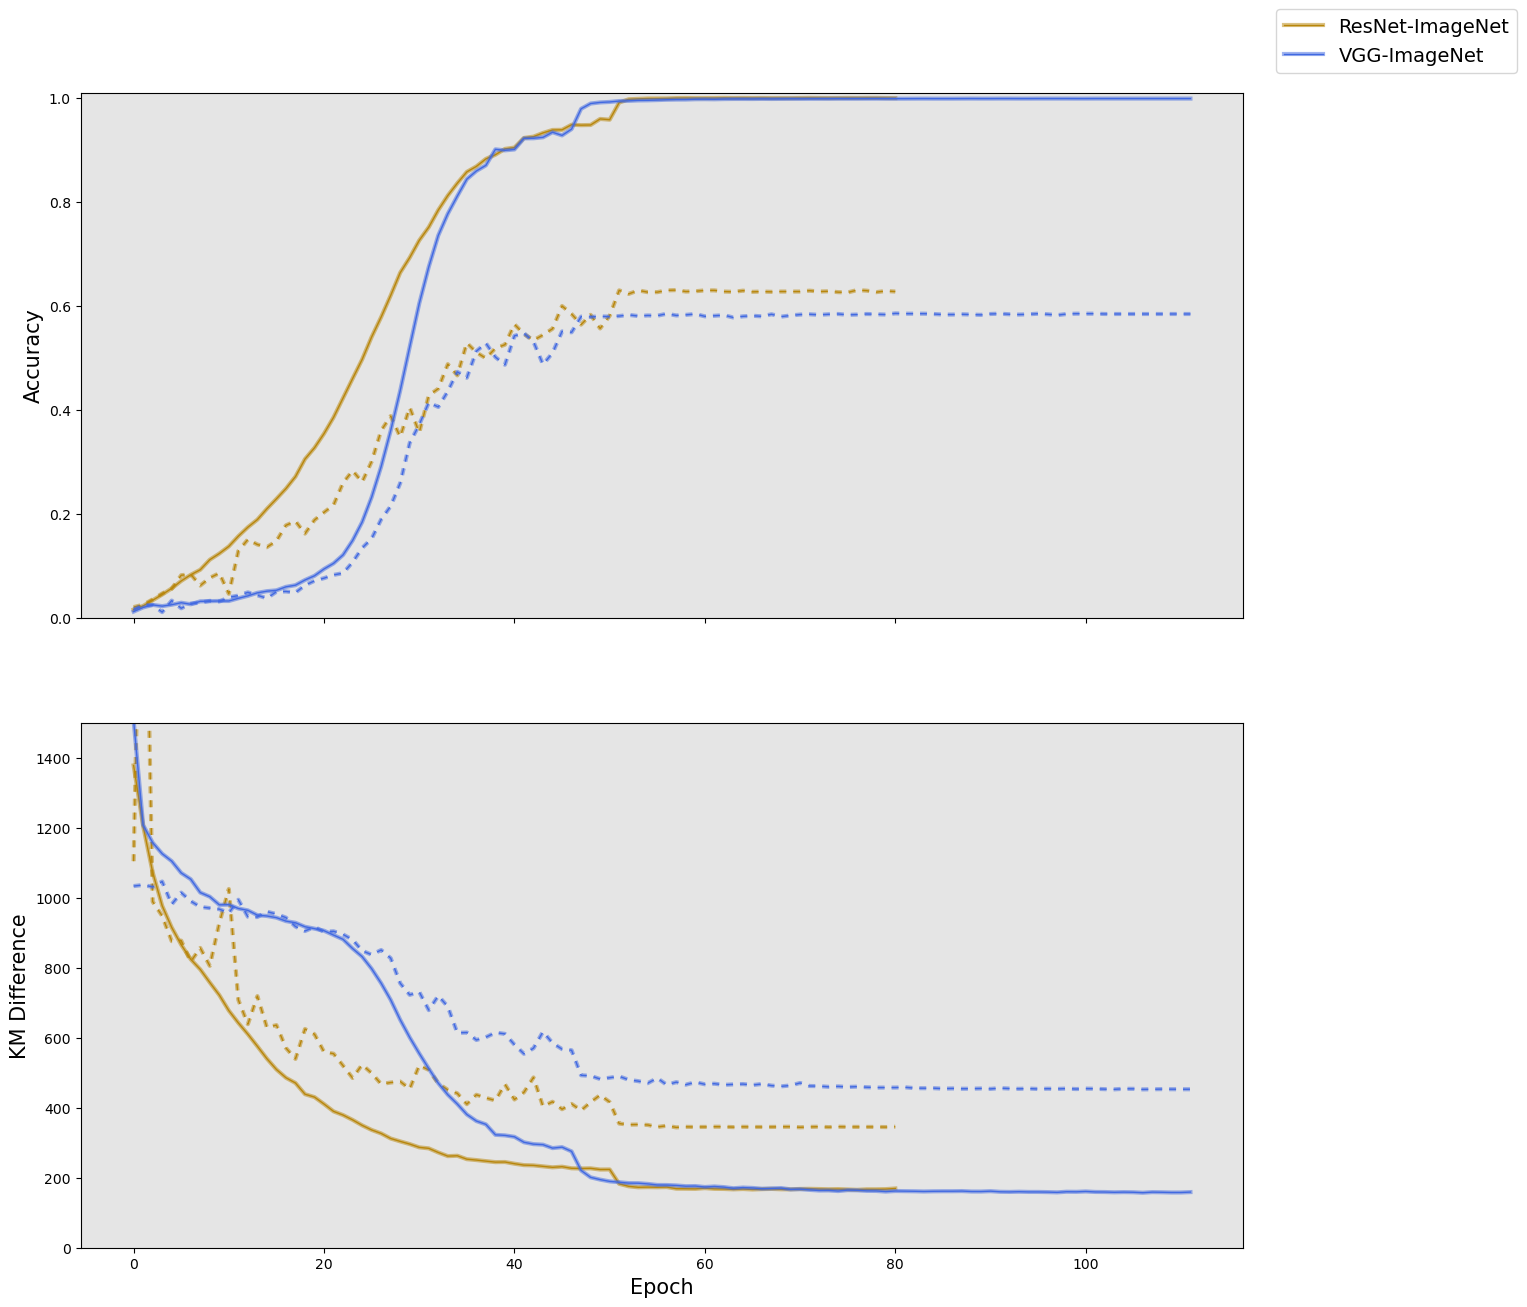

In [6]:
#list models
# pretrained imagenet ResNet Inception (125)*
# random weights ResNet Inception (125)*

# pretrained imagenet ResNet Inception (30/70/25)
# pretrained imagenet VGG (30/70/25)



paths = [['training_history/history_first_res','training_history/history_both_res','training_history/history_second_res','ResNet-ImageNet'],
        ['training_history/history_first_vgg','training_history/history_both_vgg','training_history/history_second_vgg','VGG-ImageNet']]
fig, axs = plt.subplots(2,sharex=True,figsize=(15,15))
for path in paths:
    if len(path) == 2:
        pass
    elif len(path) == 4:
        with open(path[0], "rb") as input_file:
            history_one = pickle.load(input_file)

        with open(path[1], "rb") as input_file:
            history_two = pickle.load(input_file)

        with open(path[2], "rb") as input_file:
            history_three = pickle.load(input_file)
        
        val_acc = history_one['val_Grid_accuracy']
        val_acc.extend(history_two['val_Grid_accuracy'])
        val_acc.extend(history_three['val_Grid_accuracy'])


        acc = history_one['Grid_accuracy']
        acc.extend(history_two['Grid_accuracy'])
        acc.extend(history_three['Grid_accuracy'])


        val_kmaway = history_one['val_coordinates_km_away']
        val_kmaway.extend(history_two['val_coordinates_km_away'])
        val_kmaway.extend(history_three['val_coordinates_km_away'])

        kmaway = history_one['coordinates_km_away']
        kmaway.extend(history_two['coordinates_km_away'])
        kmaway.extend(history_three['coordinates_km_away'])

        label = path[3]
        


    line_effects = {
        'ResNet-ImageNet' :{'color':'darkgoldenrod',
                            'path_effects': [path_effects.SimpleLineShadow(offset=(0, 0), shadow_color='darkgoldenrod', alpha=0.5, rho=0.3,linewidth=3),path_effects.Normal()]
        },
        'VGG-ImageNet' :{'color':'royalblue',
                            'path_effects': [path_effects.SimpleLineShadow(offset=(0, 0), shadow_color='royalblue', alpha=0.5, rho=0.3,linewidth=3),path_effects.Normal()]},           
        'training/chemprop/chemprop-': {'color':'black',
                            'path_effects': [path_effects.SimpleLineShadow(offset=(0, 0), shadow_color='black', alpha=0.5, rho=0.3,linewidth=3),path_effects.Normal()]}
    }
    train_style= '-'
    val_style= (0, (5, 5))
    train_size = 1
    val_size = 1


    

    axs[0].plot(acc,linestyle=train_style, linewidth=train_size,label=path[3],**line_effects[path[3]])
    axs[0].plot(val_acc,linestyle=val_style, linewidth=val_size,**line_effects[path[3]])



    axs[1].plot(kmaway,linestyle=train_style, linewidth=train_size,label=label,**line_effects[label])
    axs[1].plot(val_kmaway,linestyle=val_style, linewidth=val_size,**line_effects[label])


axs[0].set_ylabel('Accuracy',fontsize=15)
# axs[0].set_xlabel('Epoch',fontsize=12)
axs[0].legend(prop={'size': 14},bbox_to_anchor=(1.02, 1.02))
axs[0].axhspan(ymin=0,ymax=1.01,xmin=0,xmax=150,facecolor='grey',alpha=0.2)
axs[0].margins(y=0)

axs[1].set_ylabel('KM Difference',fontsize=15)
axs[1].set_xlabel('Epoch',fontsize=15)
axs[1].set_ylim(0,1500)

# axs[1].legend(prop={'size': 10},bbox_to_anchor=(1.02, 1.02))
axs[1].axhspan(ymin=0,ymax=2000,xmin=0,xmax=150,facecolor='grey',alpha=0.2)
plt.savefig('Training Plots',bbox_inches='tight')


